In [162]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import squarify
import altair as alt

alt.renderers.enable("notebook")

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
clean = pd.read_csv("cleaned_data.csv", encoding = 'latin-1')
dirty = pd.read_csv("dirty_data.csv", encoding = 'latin-1')

clean.head()

,Rescue_ID,Date_Caught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,ReleaseSite,...,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,Date_Release,Release_Admiss_Notes,SpecialRemarks,PCVNumber,Expenditure
0,1998_RE_0001,4/17/1998,researcher_19,site_110,creek,net,fisher_619,site_58,species_1,site_80,...,58.42,NaN,Unknown,NaN,Released,4/17/1998,NaN,NaN,NaN,NaN
1,1998_RE_0002,7/7/1998,researcher_15,site_15,creek,longline,fisher_522,site_22,species_1,not_recorded,...,36.83,NaN,Unknown,1B-1LLS,NaN,NaN,NaN,NaN,NaN,NaN
2,1998_RE_0003,8/3/1998,not_recorded,site_12,creek,not_recorded,fisher_1254,not_recorded,species_1,site_109,...,33.00,NaN,Unknown,NaN,Released,8/3/1998,NaN,NaN,NaN,NaN
3,1998_RE_0004,8/7/1998,researcher_19,site_110,creek,not_recorded,fisher_360,not_recorded,species_2,site_108,...,31.75,NaN,Unknown,There was pillings on carapace.,Released,8/7/1998,NaN,NaN,NaN,NaN
4,1998_RE_0005,9/25/1998,researcher_17,site_8,creek,collected floater,fisher_865,site_8,species_3,site_121,...,63.50,NaN,Unknown,Bs on C+ old panga wounds,Released,9/25/1998,Found trapped in mangroves,NaN,NaN,NaN


In [3]:
with open("cleaned_data.csv", "r", encoding='latin-1') as csvfile1:
    with open ("dirty_data.csv", "r", encoding='latin-1') as csvfile2:
        reader1 = [row for row in csv.reader(csvfile1)]
        reader2 = [row for row in csv.reader(csvfile2)]
        labels = []
        count = 0
        for row1, row2 in zip(reader1, reader2):
            diff = []                        #counter for difference
            for i, x in enumerate(row1):
                if str(row1[i]).lower().strip() != str(row2[i]).lower().strip():      #check string similarity
                    diff.append(1)                                        
                else:
                    diff.append(0)
            labels.append(diff)
#             if diff > 0:
#                 labels[count] = 1
#             else:
#                 labels[count] = 0                 
                #print(str(row1[i]).strip(), str(row2[i]).strip())
                #print(count)
            count +=1
            
#DELETE THE FIRST ITEM COLUMN HEADERS
#del labels[0]
new_labels = labels[1:].copy()

#CREATE A DATAFRAME WITH THE LABELS 
labels_df = pd.DataFrame(new_labels)
#label_df = pd.DataFrame(list(zip(labels.keys(), labels.values())), columns = ['row', 'label'] )
#label_df.label.value_counts()

In [4]:
labels_df.columns

RangeIndex(start=0, stop=26, step=1)

### Confirm the shape matches that of the dataframe

In [5]:
clean.shape, labels_df.shape

((4292, 26), (4292, 26))

### APPEND THE NEW DATAFRAME LABEL COLUMN TO THE CLEANED DATA

In [6]:
#clean = clean.merge(labels_df, left_index= True, right_index = True, how = 'inner')

In [7]:
clean.shape

(4292, 26)

In [8]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292 entries, 0 to 4291
Data columns (total 26 columns):
Rescue_ID                4292 non-null object
Date_Caught              4292 non-null object
Researcher               4292 non-null object
CaptureSite              4292 non-null object
ForagingGround           4284 non-null object
CaptureMethod            4292 non-null object
Fisher                   4292 non-null object
LandingSite              4292 non-null object
Species                  4292 non-null object
ReleaseSite              4288 non-null object
Tag_1                    4292 non-null object
Tag_2                    4292 non-null object
Tag_3                    0 non-null float64
Lost_Tags                213 non-null object
T_Number                 2 non-null object
CCL_cm                   4273 non-null float64
CCW_cm                   4271 non-null float64
Weight_Kg                690 non-null float64
Sex                      3167 non-null object
TurtleCharacteristics  

In [9]:
#Change Date_Caught column to datetime
clean['Date_Caught'] = pd.to_datetime(clean['Date_Caught'])

#clean[~(clean['Date_Caught'].dt.year.isin(['2008', '2009']))]['Date_Caught'].dt.year.value_counts().plot(kind = 'bar')

### Exploratory Data Analysis

In [10]:
clean.select_dtypes(include=['float']).describe()

,Tag_3,CCL_cm,CCW_cm,Weight_Kg,PCVNumber,Expenditure
count,0.0,4273.000000,4271.000000,690.000000,0.0,0.0
mean,NaN,46.101446,43.387801,11.260725,NaN,NaN
std,NaN,11.116282,9.869579,7.346254,NaN,NaN
min,NaN,3.800000,3.600000,0.050000,NaN,NaN
25%,NaN,40.400000,38.700000,6.500000,NaN,NaN
50%,NaN,44.100000,42.200000,9.500000,NaN,NaN
75%,NaN,50.300000,46.650000,13.000000,NaN,NaN
max,NaN,113.800000,102.600000,47.000000,NaN,NaN


In [11]:
clean.select_dtypes(include=['object']).describe()

,Rescue_ID,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,ReleaseSite,Tag_1,Tag_2,Lost_Tags,T_Number,Sex,TurtleCharacteristics,Status,Date_Release,Release_Admiss_Notes,SpecialRemarks
count,4292,4292,4292,4284,4292,4292,4292,4292,4288,4292,4292,213,2,3167,4255,2991,681,276,69
unique,4292,21,74,3,11,1074,35,5,51,2773,48,115,2,4,4130,3,468,98,29
top,2005_RE_0367,researcher_9,site_53,creek,net,fisher_861,site_8,species_1,site_80,KE3032,None,KE1805,T002,Unknown,clean,Released,10/19/2002,Caught the day before,Fibropapillomatosis
freq,1,1930,911,3193,3506,530,1696,3662,2273,24,4240,16,1,3140,34,2948,8,149,20


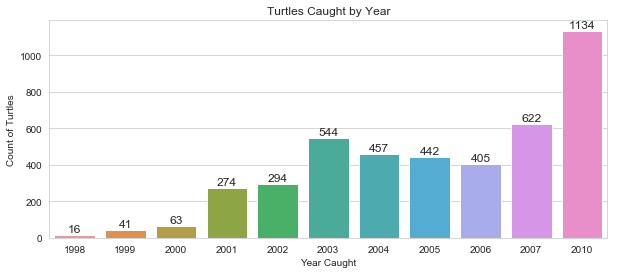

In [12]:
yearly = clean['Date_Caught'].dt.year.value_counts().sort_index()

plt.figure(figsize = (10, 4))
ax = sns.barplot(yearly.index, yearly.values)
bars = ax.patches
values = yearly.values

for b, v in zip(bars, values):
    h = b.get_height()
    w = b.get_width()
    x_loc = b.get_x()
    ax.text(x_loc + w/2, h + 5, v, ha = 'center', va = 'bottom', fontsize= 12)
    
ax.set_ylabel("Count of Turtles")
ax.set_xlabel("Year Caught")
ax.set_title("Turtles Caught by Year")
plt.show()

In [13]:
def limit_percentile(df, group_col=None,value_col='Rescue_ID',alpha = 0.75 ):
    
    """ Return the provided label for items whose cumsum is below the 
    alpha value else return 'Others' for the remaining labels.
    """
    
    frame = df.groupby([group_col])[value_col].size()\
        .sort_values(ascending= False)\
        .fillna(value = 0).reset_index()
    
    #GET CUMSUM PERCENTILE
    frame['perc'] = frame[value_col].cumsum()/ frame[value_col].sum()
    
    #GET LABEL FILTERED BY ALPHA ON CUMSUM PERCENTILE
    frame['new_label'] = frame[['perc',group_col]].apply(lambda x: x[group_col] 
                                                       if(x['perc'] < alpha ) else "Others", axis = 1)
    
    #DROP THE CUMSUM PERCENTILE COLUMN
    frame.drop('perc', axis = 1, inplace = True)
    
    frame = frame.groupby("new_label")[value_col].sum()

    return frame

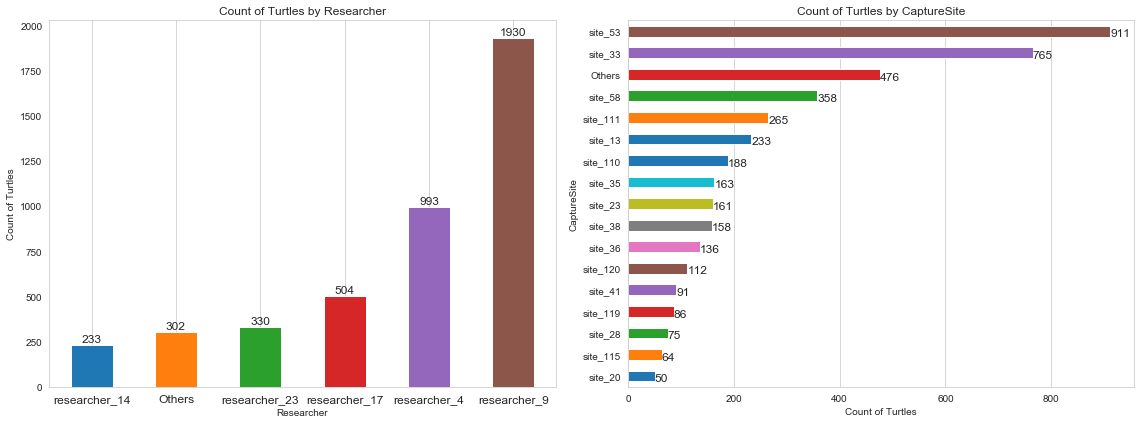

In [14]:
plt.figure(figsize = (16, 6))

##FIRST PLOT BY RESEARCHER
plt.subplot(1, 2, 1)
researchers = limit_percentile(clean,group_col='Researcher', alpha=.95).sort_values()
ax = researchers.plot(kind = 'bar')

bars, values, labels= ax.patches, researchers.values, researchers.index

for b, v in zip(bars, values):
    h, w, x_loc = b.get_height(), b.get_width(), b.get_x()
    ax.text(x_loc + w/2, h + 5, v, ha = 'center', va = 'bottom', fontsize= 12)
ax.set_xticklabels(labels = labels, rotation = 0, fontsize = 12)
ax.yaxis.grid(which='major')
ax.set_ylabel("Count of Turtles"), ax.set_xlabel("Researcher")
ax.set_title("Count of Turtles by Researcher")

##SECOND PLOT BY CAPTURESITE
plt.subplot(1, 2, 2)
capture_site = limit_percentile(clean,group_col='CaptureSite', alpha=.9)
capture_site = capture_site.sort_values()

ax = capture_site.plot(kind = 'barh')
bars, values, labels = ax.patches, capture_site.values, capture_site.index

for b, v in zip(bars, values):
    h, w, y_loc = b.get_height(),b.get_width(), b.get_y()
    ax.text(w, y_loc, v, ha = 'left', va = 'baseline', fontsize= 12)
ax.yaxis.grid(which='major'); ax.set_xlabel("Count of Turtles"); ax.set_ylabel("CaptureSite")
ax.set_title("Count of Turtles by CaptureSite")
plt.tight_layout()

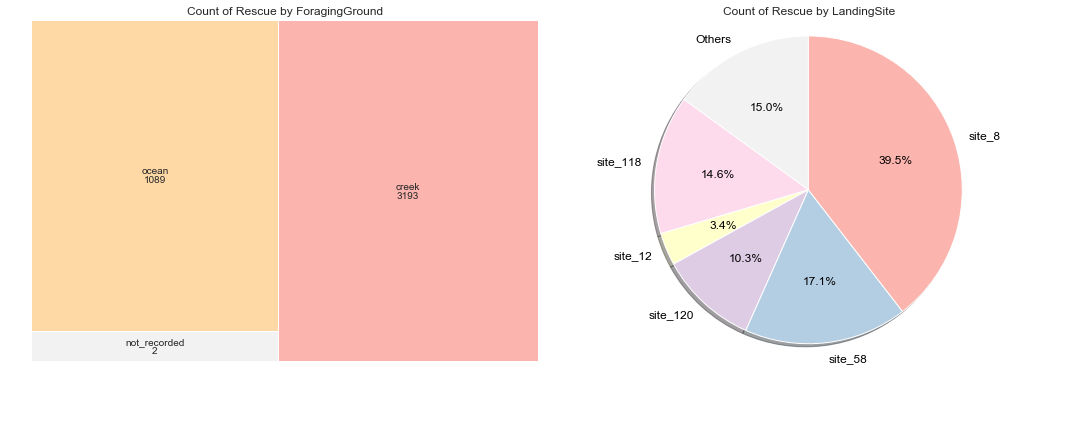

In [15]:
plt.figure(figsize = (15, 6))

#FIRST PLOT BY FORAGINGROUND
plt.subplot(1, 2, 1)
foraging_ground = clean['ForagingGround'].value_counts().sort_values()
values = [np.log(i) for i in foraging_ground.values] #foraging_ground.values.tolist()
labels = foraging_ground.index.tolist()

cmap = plt.get_cmap("Pastel1_r")
c = [cmap(i) for i in np.linspace(0, 1, len(values))]
ax = squarify.plot(sizes = values, label= labels, color = c, value = foraging_ground.values, alpha=1)

ax.set_xticklabels(labels =labels, rotation = 45)
ax.set_title("Count of Rescue by ForagingGround")
plt.axis("off")

#SECOND PLOT BY LANDINGSITE
plt.subplot(1, 2, 2)
landing_site = limit_percentile(clean, group_col='LandingSite', alpha=0.85)

cmap = plt.get_cmap('Pastel1_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(landing_site.index))]
plt.pie(landing_site.values, labels = landing_site.index, colors = colors,
        shadow= True, autopct= "%1.1f%%", startangle= 90, textprops= {'color': 'black', 'fontsize': 12})
plt.axis('equal')
plt.title("Count of Rescue by LandingSite")

plt.tight_layout()
plt.show()

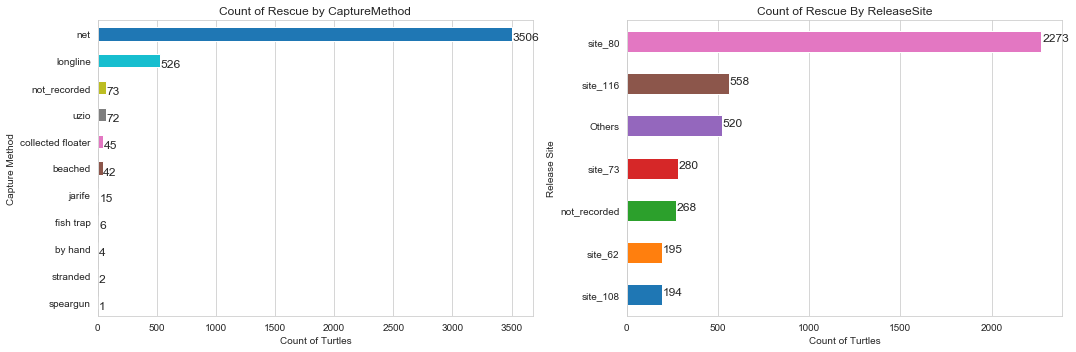

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
capture_method = clean['CaptureMethod'].value_counts().sort_values()
ax = capture_method.plot(kind = 'barh')
bars = ax.patches
values = capture_method.values
labels = capture_method.index

for b, v in zip(bars, values):
    h, w, y_loc = b.get_height(), b.get_width(), b.get_y()
    ax.text(w+5, y_loc, v, ha = 'left', va = 'baseline', fontsize= 12)
ax.set_ylabel("Capture Method")
ax.set_xlabel("Count of Turtles")
ax.set_title("Count of Rescue by CaptureMethod")
ax.yaxis.grid(which='major')

plt.subplot(1, 2, 2)
release_site = limit_percentile(clean, group_col='ReleaseSite', alpha=0.90).sort_values()
ax = release_site.plot(kind='barh')
bars = ax.patches
values = release_site.values
labels = release_site.index

for b, v in zip(bars, values):
    h, w, y_loc = b.get_height(), b.get_width(), b.get_y()
    ax.text(w+5, y_loc + h/2, v, ha = 'left', va = 'baseline', fontsize= 12)
ax.yaxis.grid(which= 'major')
ax.set_title("Count of Rescue By ReleaseSite")
ax.set_xlabel("Count of Turtles")
ax.set_ylabel("Release Site")

plt.tight_layout()

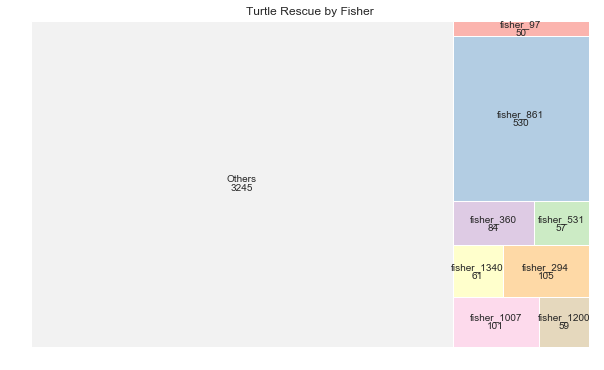

In [17]:
fisher = limit_percentile(clean, group_col='Fisher', alpha=0.25)

values = [np.log(i) for i in fisher.values]
plt.figure(figsize = (10, 6))
cmap = plt.get_cmap("Pastel1_r")
colors = [cmap(i) for i in np.linspace(0, 1, len(fisher.values))]

ax = squarify.plot(sizes=fisher.values, label= fisher.index, 
                   color= colors, 
                   value= fisher.values)

ax.set_title("Turtle Rescue by Fisher")
plt.axis("off")
plt.show()

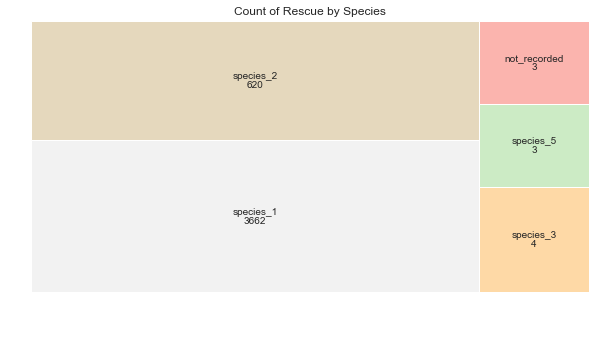

In [18]:
species = clean['Species'].value_counts()
values = [np.log(i) for i in species.values] #foraging_ground.values.tolist()
labels = species.index.tolist()

plt.figure(figsize=(10, 5))
cmap = plt.get_cmap("Pastel1_r")
c = [cmap(i) for i in np.linspace(0, 1, len(values))]
ax = squarify.plot(sizes = values, label= labels, color = c, value = species.values, alpha=1)

ax.set_xticklabels(labels =labels, rotation = 45)
ax.set_title("Count of Rescue by Species")
plt.axis("off")
plt.show()

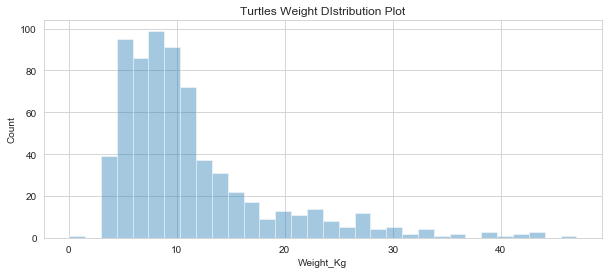

In [19]:
plt.figure(figsize=(10, 4))
ax = sns.distplot(clean['Weight_Kg'].dropna(), kde = False)
ax.set_title("Turtles Weight DIstribution Plot")
ax.set_ylabel("Count")
plt.show()


### TurtlesCharacteristics Text Exploration

In [155]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud, STOPWORDS

lemma = WordNetLemmatizer()
stopwords = stopwords.words()


In [163]:
chars = clean['TurtleCharacteristics'].str.cat(sep=' ')

def clean_text(text):
    text = re.sub('^\W', " ", text)
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\&', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\s+', ' ', text, flags= re.I)
    text = text.lower().split()

    text = [lemma.lemmatize(word) for word in text if word not in stopwords]
    text = " ".join(text)
    return text

text= clean_text(chars)

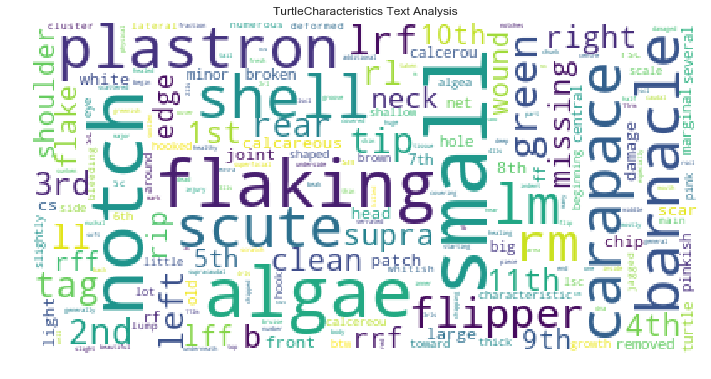

In [164]:
def plotWordCloud(data, title, cmap = 'viridis', figsize =(12, 12)):
    wc = WordCloud(
        background_color = 'white',
        #stopwords = STOPWORDS,
        max_words = 200, max_font_size = 50,
        relative_scaling = .6,
        normalize_plurals = True,
        collocations = False,
        colormap = cmap
    ).generate(data)
    
    plt.figure(figsize = figsize)
    plt.grid(False)
    plt.imshow(wc)
    plt.title(title)
    plt.axis("off")
    plt.show()

#Plot the wordcloud 
plotWordCloud(text, title = 'TurtleCharacteristics Text Analysis')
